In [1]:
import pandas as pd #load and manipulate data and for one-hot encoding
import numpy as numpy # calculate the mean and standard deviation
import xgboost as xgb #contains both XGBClassifier and XGBRegressor
import graphviz #graphviz
from sklearn.model_selection import train_test_split #split data into training and testing
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from xgboost import XGBClassifier
from sklearn. metrics import accuracy_score

In [2]:
#데이터 다운로드
df = pd.read_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\df.xlsx') 

In [3]:
list1 = list(df.columns)

In [4]:
#one-hot encoding이 명목형 변수들 선택
df2 = df.filter(['select_reason','SMONTH','SDAY','EMONTH','EDAY','VAC','info_gain','refer_site','transport','edu_level','edu_state','marriage','householder_edu_level','working','job','job_status','work5day','nowork_reason','earn_self','car','BSEX','edu_classify','job_classify','residential_area','earn_self_classify','BMAR'])

In [5]:
list2 = list(df2.columns)

In [6]:
# 실수형 칼럼들만 남기기
listnew = []
for x in list1:
    if(x in list2):
        continue
    else:
        listnew.append(x)

In [7]:
#실수형 데이터셋
dfint = df[listnew]
dfint.head(5)

,ID,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,SEJONG,KYUNGGI,GANGWON,CHOONG_N,CHOONG_S,JEON_N,JEON_S,KYUNG_N,KYUNG_S,JEJU
0,22020520011_1229732,4,1,1,100000.0,1,100000.0,NaN,NaN,NaN,...,0,0.0,0.0,0,0.0,1.0,0.0,3.0,0.0,0.0
1,11090711981_1129310,3,1,1,250000.0,1,250000.0,NaN,NaN,NaN,...,0,1.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2503073057A_1070957,3,1,0,50001.0,3,16667.0,NaN,NaN,NaN,...,0,0.0,0.0,0,2.0,1.0,0.0,0.0,0.0,0.0
3,26030550451_1334180,3,1,1,120000.0,1,120000.0,NaN,NaN,NaN,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,11080630451_1223531,2,1,2,350001.0,3,116667.0,NaN,NaN,NaN,...,0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
df2.head(5)

,select_reason,SMONTH,SDAY,EMONTH,EDAY,VAC,info_gain,refer_site,transport,edu_level,...,work5day,nowork_reason,earn_self,car,BSEX,edu_classify,job_classify,residential_area,earn_self_classify,BMAR
0,1.0,8,10,8,11,NaN,5.0,NaN,1.0,6,...,1.0,NaN,4,1,2,4,1,22,3,2
1,2.0,5,5,5,6,NaN,3.0,NaN,1.0,4,...,2.0,NaN,3,1,2,3,3,11,2,2
2,8.0,3,1,3,1,NaN,5.0,NaN,1.0,6,...,NaN,2.0,1,1,2,4,12,25,1,1
3,2.0,11,16,11,17,NaN,5.0,NaN,8.0,4,...,1.0,NaN,5,1,1,3,1,26,4,2
4,5.0,8,15,8,17,1.0,7.0,NaN,1.0,5,...,2.0,NaN,6,1,1,4,1,11,5,2


In [8]:
#명목형 데이터셋 
dfobj = df[list2]
all_object = all([col_type == numpy.dtype(object) for col_type in dfobj.dtypes])
if not all_object:
    dfobj = dfobj.astype(object)
    
dfobj.head(5)

In [9]:
dfobj.head(5)

,select_reason,SMONTH,SDAY,EMONTH,EDAY,VAC,info_gain,refer_site,transport,edu_level,...,work5day,nowork_reason,earn_self,car,BSEX,edu_classify,job_classify,residential_area,earn_self_classify,BMAR
0,1,8,10,8,11,NaN,5,NaN,1,6,...,1,NaN,4,1,2,4,1,22,3,2
1,2,5,5,5,6,NaN,3,NaN,1,4,...,2,NaN,3,1,2,3,3,11,2,2
2,8,3,1,3,1,NaN,5,NaN,1,6,...,NaN,2,1,1,2,4,12,25,1,1
3,2,11,16,11,17,NaN,5,NaN,8,4,...,1,NaN,5,1,1,3,1,26,4,2
4,5,8,15,8,17,1,7,NaN,1,5,...,2,NaN,6,1,1,4,1,11,5,2


In [13]:
#계절 별 열을 새로 추가
def season(df2):
    df2['winter'] = numpy.where(df2['SMONTH'] == 12, 1, 0)
    df2['winter'] = numpy.where(df2['SMONTH'] == 1, 1, df2['winter'])
    df2['winter'] = numpy.where(df2['SMONTH'] == 2, 1, df2['winter'])

    df2['spring'] = numpy.where(df2['SMONTH'] == 3, 1, 0)
    df2['spring'] = numpy.where(df2['SMONTH'] == 4, 1, df2['spring'])
    df2['spring'] = numpy.where(df2['SMONTH'] == 5, 1, df2['spring'])

    df2['summer'] = numpy.where(df2['SMONTH'] == 6, 1, 0)
    df2['summer'] = numpy.where(df2['SMONTH'] == 7, 1, df2['summer'])
    df2['summer'] = numpy.where(df2['SMONTH'] == 8, 1, df2['summer'])

    df2['autumn'] = numpy.where(df2['SMONTH'] == 9, 1, 0)
    df2['autumn'] = numpy.where(df2['SMONTH'] == 10, 1, df2['autumn'])
    df2['autumn'] = numpy.where(df2['SMONTH'] == 11, 1, df2['autumn'])


In [14]:
season(dfobj)

In [15]:
dfobj['winter']

0        0
1        0
2        0
3        0
4        0
        ..
10498    0
10499    1
10500    1
10501    1
10502    1
Name: winter, Length: 10503, dtype: int32

In [16]:
seasonlist = ['winter','autumn','summer','spring']
dfseason = dfobj[seasonlist]
dfobj.drop(['winter'],axis=1,inplace=True)
dfobj.drop(['autumn'],axis=1,inplace=True)
dfobj.drop(['summer'],axis=1,inplace=True)
dfobj.drop(['spring'],axis=1,inplace=True)
dfseason

,winter,autumn,summer,spring
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
10498,0,1,0,0
10499,1,0,0,0
10500,1,0,0,0
10501,1,0,0,0


In [19]:
#one-hot encodding
dfobj = pd.get_dummies(dfobj)

dfobj.head(5)

,select_reason_1.0,select_reason_2.0,select_reason_3.0,select_reason_4.0,select_reason_5.0,select_reason_6.0,select_reason_7.0,select_reason_8.0,select_reason_9.0,select_reason_10.0,...,earn_self_classify_3,earn_self_classify_4,earn_self_classify_5,earn_self_classify_6,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [53]:
dfobj['winter'] = dfseason['winter']
dfobj['spring'] = dfseason['spring']
dfobj['summer'] = dfseason['summer']
dfobj['autumn'] = dfseason['autumn']
dfobj['ID'] = dfint['ID']

In [54]:
dfint['Satify'].isna().sum()

1346

In [57]:
dfint.to_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\dfr1.xlsx')

In [59]:
dfobj.to_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\dfr2.xlsx')

In [62]:
df = pd.read_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\dfr.xlsx', index = False) #불필요한 열 삭제

In [63]:
#결측치 처리
df=df.fillna(0)
df.drop(['ID'],axis=1,inplace=True)

In [64]:
df['Satify']

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
10498    0.0
10499    0.0
10500    0.0
10501    0.0
10502    0.0
Name: Satify, Length: 10503, dtype: float64

In [65]:
#만족도, 재방문률, 추천정도 변수를 합쳐
#타겟변수설정
point = df['Satify']+df['revisit']+df['recommend']

#point2 = point >= 15
#(point2.values==True).sum()

#point2 = point >= 14
#(point2.values==True).sum()

#point2 = point >= 13
#(point2.values==True).sum()

point2 = point >= 12
(point2.values==True).sum()

#point2 = point >= 11
#(point2.values==True).sum()

#point2 = point >= 10
#(point2.values==True).sum()

7852

In [66]:
#데이터 프레임 상 타겟변수 제거
df.drop(['Satify'],axis=1,inplace=True)
df.drop(['revisit'],axis=1,inplace=True)
df.drop(['recommend'],axis=1,inplace=True)
df.head()

,Unnamed: 0,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,0,4,1,1,100000.0,1,100000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,1,3,1,1,250000.0,1,250000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2,2,3,1,0,50001.0,3,16667.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,2,1,2,350001.0,3,116667.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [67]:
#훈련용 데이터셋, 시험 데이터셋 설정
X_train, X_test, y_train, y_test = train_test_split(df, point2, random_state=42, stratify = point2)
#훈련용 데이터셋 타겟변수 분포 확인
sum(y_train)/len(y_train)

0.7476196521518345

In [68]:
#모델링(기준:'mae')
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='mae',
           eval_set=[(X_test, y_test)])

[0]	validation_0-mae:0.41463
Will train until validation_0-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:0.35602
[2]	validation_0-mae:0.31373
[3]	validation_0-mae:0.28336
[4]	validation_0-mae:0.26001
[5]	validation_0-mae:0.24358
[6]	validation_0-mae:0.23215
[7]	validation_0-mae:0.22386
[8]	validation_0-mae:0.21699
[9]	validation_0-mae:0.21249
[10]	validation_0-mae:0.20839
[11]	validation_0-mae:0.20588
[12]	validation_0-mae:0.20328
[13]	validation_0-mae:0.20045
[14]	validation_0-mae:0.19893
[15]	validation_0-mae:0.19824
[16]	validation_0-mae:0.19694
[17]	validation_0-mae:0.19664
[18]	validation_0-mae:0.19637
[19]	validation_0-mae:0.19540
[20]	validation_0-mae:0.19496
[21]	validation_0-mae:0.19442
[22]	validation_0-mae:0.19429
[23]	validation_0-mae:0.19371
[24]	validation_0-mae:0.19245
[25]	validation_0-mae:0.19192
[26]	validation_0-mae:0.19119
[27]	validation_0-mae:0.19082
[28]	validation_0-mae:0.19049
[29]	validation_0-mae:0.19010
[30]	validation_0-mae:0.18981
[31]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [69]:
#train 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_train)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_train, predictions)
print("train Accuracy: %.2f%%" % (accuracy * 100.0))

#test 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_test, predictions)
print("test Accuracy: %.2f%%" % (accuracy * 100.0))

train Accuracy: 99.06%
test Accuracy: 87.17%


In [70]:
#모델링(기준:'AUC')
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.88750
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.90039
[2]	validation_0-aucpr:0.90190
[3]	validation_0-aucpr:0.90385
[4]	validation_0-aucpr:0.91319
[5]	validation_0-aucpr:0.91737
[6]	validation_0-aucpr:0.91264
[7]	validation_0-aucpr:0.91321
[8]	validation_0-aucpr:0.91966
[9]	validation_0-aucpr:0.91729
[10]	validation_0-aucpr:0.91915
[11]	validation_0-aucpr:0.91972
[12]	validation_0-aucpr:0.92069
[13]	validation_0-aucpr:0.92231
[14]	validation_0-aucpr:0.92331
[15]	validation_0-aucpr:0.92133
[16]	validation_0-aucpr:0.92187
[17]	validation_0-aucpr:0.92104
[18]	validation_0-aucpr:0.92071
[19]	validation_0-aucpr:0.92284
[20]	validation_0-aucpr:0.92379
[21]	validation_0-aucpr:0.92416
[22]	validation_0-aucpr:0.92397
[23]	validation_0-aucpr:0.92277
[24]	validation_0-aucpr:0.92375
[25]	validation_0-aucpr:0.92273
[26]	validation_0-aucpr:0.92279
[27]	validation_0-aucpr:0.92334
[28]	validation_0-aucpr:0.92246
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [71]:
#train 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_train)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_train, predictions)
print("train Accuracy: %.2f%%" % (accuracy * 100.0))

#test 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_test, predictions)
print("test Accuracy: %.2f%%" % (accuracy * 100.0))

train Accuracy: 90.01%
test Accuracy: 87.55%


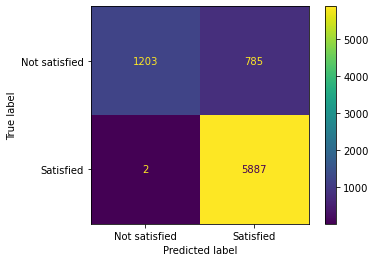

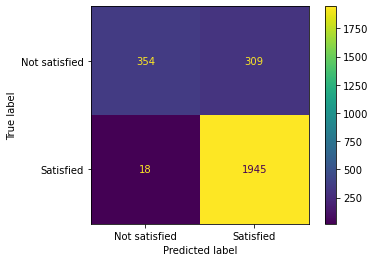

In [72]:
#훈련 모델 시각화(by.confusion matrix)
plot_confusion_matrix(clf_xgb,
                     X_train,
                     y_train,
                     values_format='d',
                     display_labels=["Not satisfied", "Satisfied"])
#테스트모델 시각화(by.confusion matrix)
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Not satisfied", "Satisfied"])

In [28]:
clf_xgb = xgb.XGBClassifier(seed=42,
                          objective='binary:logistic',
                          gamma=0.25,
                          learn_rate=0.1,
                          max_depth=6,
                          reg_lambda=10,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[12:46:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.85833
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.85903
[2]	validation_0-aucpr:0.88061
[3]	validation_0-aucpr:0.88593
[4]	validation_0-aucpr:0.88808
[5]	validation_0-aucpr:0.88898
[6]	validation_0-aucpr:0.89436
[7]	validation_0-aucpr:0.90941
[8]	validation_0-aucpr:0.90891
[9]	validation_0-aucpr:0.91101
[10]	validation_0-aucpr:0.90892
[11]	validation_0-aucpr:0.90940
[12]	validation_0-aucpr:0.90925
[13]	validation_0-aucpr:0.91607
[14]	validation_0-aucpr:0.91641
[15]	validation_0-aucpr:0.91702
[16]	validation_0-aucpr:0.91701
[17]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learn_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=3, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [29]:
#train 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_train)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_train, predictions)
print("train Accuracy: %.2f%%" % (accuracy * 100.0))

#test 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_test, predictions)
print("test Accuracy: %.2f%%" % (accuracy * 100.0))

train Accuracy: 88.17%
test Accuracy: 87.66%


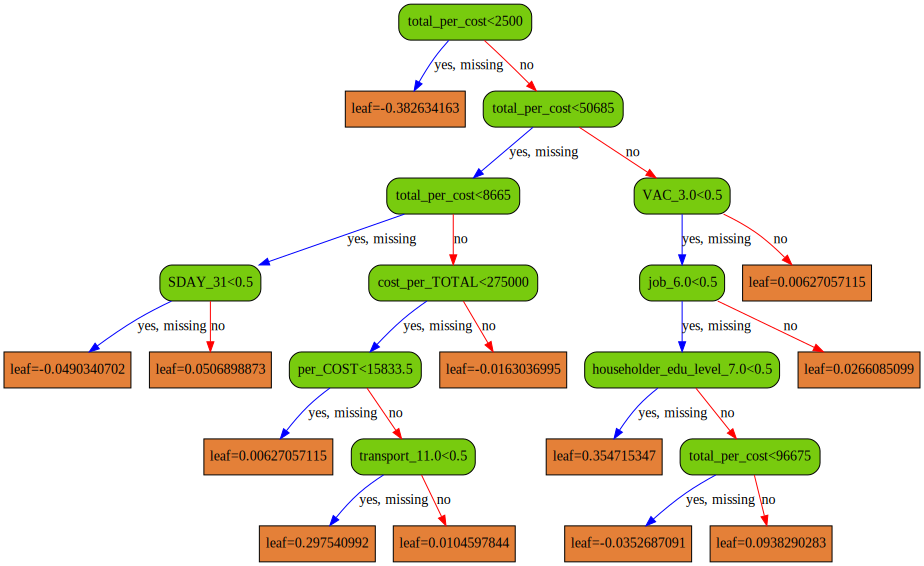

In [30]:
node_params = {'shape': 'box',
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'}
leaf_params = {'shape' : 'box',
              'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=2, size="10,10",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

In [52]:
#첫 트리만을 조사하여 적절한 gain, gamma 등에 대한 인사이트를 얻어보기
clf_xgb = xgb.XGBClassifier(seed=42,
                          objective='binary:logistic',
                          gamma=0.25,
                          learn_rate=0.1,
                          max_depth=6,
                          reg_lambda=10,
                          scale_pos_weight=3,
                          subsample=0.9,
                          colsample_bytree=0.5,
                           n_estimators=1) # 하나의 첫 트리로 고정
clf_xgb.fit(X_train,y_train)


#첫 트리의 weight, gain, cover 뽑아보기

bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))
    
node_params = {'shape': 'box',
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'}
leaf_params = {'shape' : 'box',
              'style': 'filled',
               'fillcolor': '#e48038'}


[12:40:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learn_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


weight:  {'total_cost': 1}
gain:  {'total_cost': 3055.67969}
cover:  {'total_cost': 4428.25}
total_gain:  {'total_cost': 3055.67969}
total_cover:  {'total_cost': 4428.25}


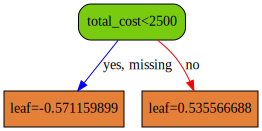

In [53]:
xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)